# py-SP(k) - Examples

Herer we give a few of examples of how some of the functions contained with py-SP(K) can be used to predict the suppression of the total matter power spectrum due to baryonic physics. For a detailed description of the model and how it was developed see the original paper in XXX.

First, let us import the necessary modules. For this tutorial you will need to have the following modules installed:

- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/stable/index.html)
- [cycler](https://pypi.org/project/cycler/)
- [pyspk](https://github.com/jemme07/pyspk)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from cycler import cycler
import pyspk.model as spk
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.labelsize'] = 15

## Example 1: Using a power-law fit to the $f_b$ - $M_\mathrm{halo}$ relation

In out first example, we will provide py-SP(k) with the power-law parameters fitted to the fiducial BAHAMAS simulations ([McCarthy et al. 2017](https://academic.oup.com/mnras/article/465/3/2936/2417021)) at redshift $z=0.125$. We will use a spherical-overdensity of 200. The functional form used is:

$$f_b / (\Omega_b/\Omega_m) = a \left(\frac{M_{200c}}{10^{13.5}\mathrm{M}_\odot} \right)^{b}$$

Note that the power-law has been normalised at $M_\mathrm{halo} = 10^{13.5} \mathrm{M}_\odot$.

In [2]:
z = 0.125
fb_a = 0.4
fb_pow = 0.3
fb_norm = 10 ** 13.5

k, sup = spk.sup_model(SO=200, z=z, fb_a=fb_a, fb_pow=fb_pow, fb_norm=fb_norm, k_max=10, verbose=True)

Using power-law fit for fb - M_halo at z=0.125, normalised at M_halo = 3.16e+13 [M_sun] 


/var/folders/mm/97jkmxws1v5381f7n2hfm_9w0000gn/T/ipykernel_4818/1679908283.py:6: UserWarning: Scales with k_max > k_ny = 8 [h/Mpc] may not be accurately reproduced by the model. 
  k, sup = spk.sup_model(SO=200, z=z, fb_a=fb_a, fb_pow=fb_pow, fb_norm=fb_norm, k_max=10, verbose=True)


Now we can have a look at what the supression looks like at this redshift.

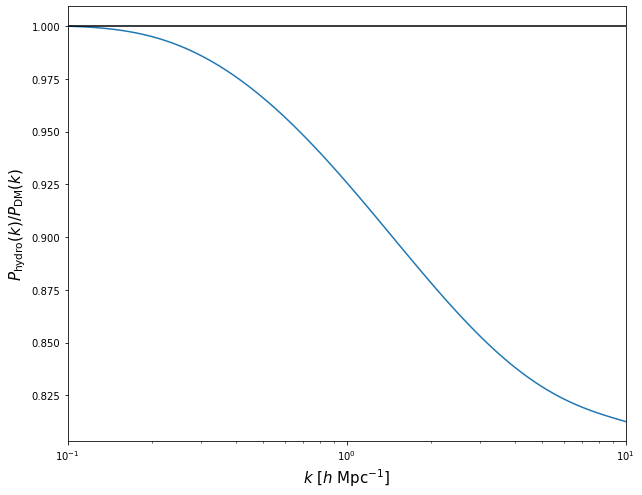

In [3]:
plt.figure()
plt.plot(k, sup)
plt.xscale('log')

plt.axhline(1, c='k')
plt.xlabel('$k$ [$h$ Mpc$^{-1}$]');
plt.ylabel('$P_\mathrm{hydro}(k)/P_\mathrm{DM}(k)$');
plt.xlim(0.1, 10);

In [4]:
k, sup, error_68_m, error_68_p, error_95_m, error_95_p = spk.sup_model(SO=200, 
                                                                       z=.125, 
                                                                       fb_a=.6, 
                                                                       fb_pow=.1, 
                                                                       fb_norm=fb_norm, 
                                                                       k_max=12, 
                                                                       errors=True)


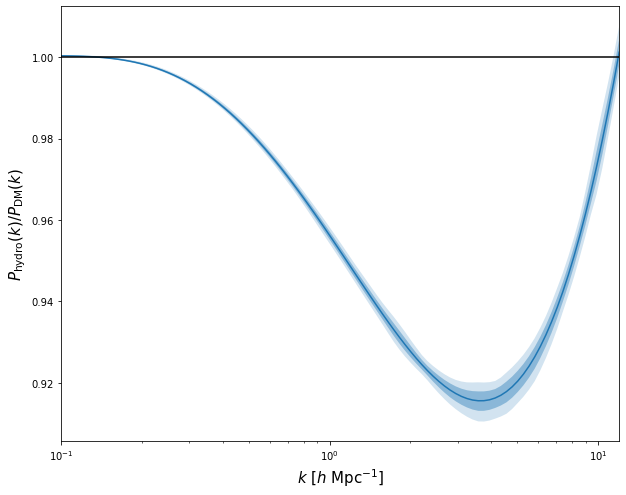

In [5]:
c = 'C0'
plt.figure()
plt.plot(k, sup, c=c)
plt.fill_between(k, sup + error_95_m, sup + error_95_p, facecolor=c, alpha=0.2)
plt.fill_between(k, sup + error_68_m, sup + error_68_p, facecolor=c, alpha=0.4)
plt.xscale('log')

plt.axhline(1, c='k')
plt.xlabel('$k$ [$h$ Mpc$^{-1}$]');
plt.ylabel('$P_\mathrm{hydro}(k)/P_\mathrm{DM}(k)$');
plt.xlim(0.1, 12);

## Example 2: Getting the optimal mass

We can also use py-SP(k) to obtain the optimal mass as a function of scale and redshift, as defined in Salcido et al (2022). 

For this example we use a spherical-overdensity of 200. We will provide the `spk.optimal_mass()` function with an array of scales at which we want to compute the optimal mass.

We will compute the optimal mass at redshift $z=1$.


In [6]:
k = np.logspace(-1, 1, 100)
z = 1
om = spk.optimal_mass(SO=200, z=z, k=k)

We can plot the optimal mass as function of scale at the specified redshift.

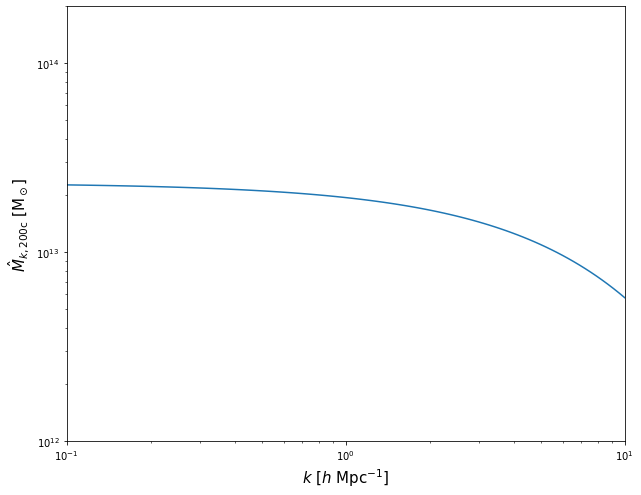

In [7]:
plt.figure()
plt.plot(k, om)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('$k$ [$h$ Mpc$^{-1}$]');
plt.ylabel('$\\hat{M}_{k,200\mathrm{c}}\,\, [\mathrm{M}_\odot]$');
plt.xlim(0.1, 10);
plt.ylim(1e12, 2e14);

## Example 3: Using binned data for the $f_b$ - $M_\mathrm{halo}$ relation

In this example we will use the baryon fraction binned in bins of halo mass from the BAHAMAS simulations ([McCarthy et al. 2017](https://academic.oup.com/mnras/article/465/3/2936/2417021)).

First we will load and take a look at the data. 

The columns are as follow: Redshift, Halo mass [$\mathrm{M}_\odot$], Baryon fraction (normalised by the Universal baryon fraction).

In [8]:
df = pd.read_csv('BAHAMAS_fb_M200.csv')
df

,z,M200,f_b
0,0.12,1.000000e+11,0.687368
1,0.12,1.258925e+11,0.695632
2,0.12,1.584893e+11,0.703069
3,0.12,1.995262e+11,0.741934
4,0.12,2.511886e+11,0.768164
...,...,...,...
516,3.00,2.511886e+13,0.753568
517,3.00,3.162278e+13,0.793468
518,3.00,3.981072e+13,0.753835
519,3.00,5.011872e+13,0.843562


We can use `pandas` to group the data by redshift as follows:

In [9]:
z_grouped = df.groupby('z')

We can now compute and plot the suppression of the total matter power spectrum for each redshift using py-SP(k). Note that we have disbabled the verbose output of py-SP(k).

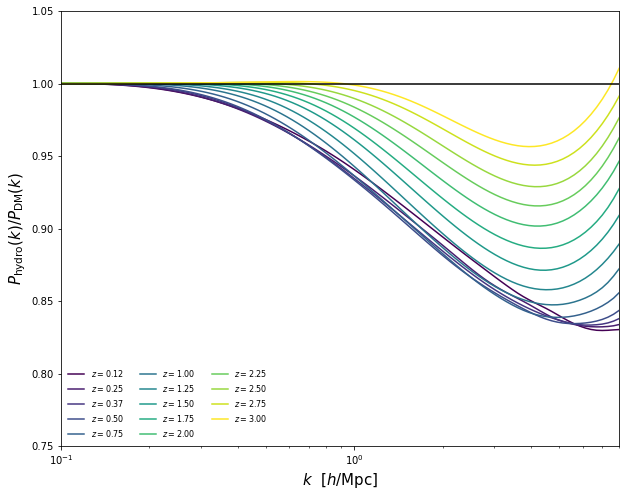

In [10]:
color = plt.cm.viridis(np.linspace(0, 1, len(z_grouped.groups.keys())))
custom_cycler = iter(cycler(color=color))

for z, group in z_grouped:
    c = next(custom_cycler)['color']
    k, sup = spk.sup_model(SO=200, z=z, M_halo=group.M200, fb=group.f_b)
    plt.plot(k, sup, label='$z=%.2f$' % z, c=c)

plt.axhline(1, c='k')
plt.xlim(1e-1, 8)
plt.ylim(.75, 1.05)
plt.legend(loc=3, ncol=3, fontsize=8, frameon=False)
plt.xscale('log')
plt.xlabel('$k$  $[h/\\mathrm{Mpc}]$');
plt.ylabel('$P_\\mathrm{hydro}(k)/P_\\mathrm{DM}(k)$');

In [11]:
z = .125
fb_a = 0.3
fb_pow = .4
fb_norm = 10 ** 13.5

k, sup, error_68_m, error_68_p, error_95_m, error_95_p = spk.sup_model(SO=200, z=z, fb_a=fb_a, fb_pow=fb_pow, 
                                                                       fb_norm=fb_norm, k_max=12, errors=True)
om = spk.optimal_mass(SO=200, z=z, k=k)

fb = fb_a * np.power(om / fb_norm, fb_pow)

min_fb = spk._inter_min_x0(z) + spk._inter_min_x1(z) * np.log10(om) + spk._inter_min_x2(z) * np.log10(om) ** 2
max_fb = spk._inter_max_x0(z) + spk._inter_max_x1(z) * np.log10(om) + spk._inter_max_x2(z) * np.log10(om) ** 2

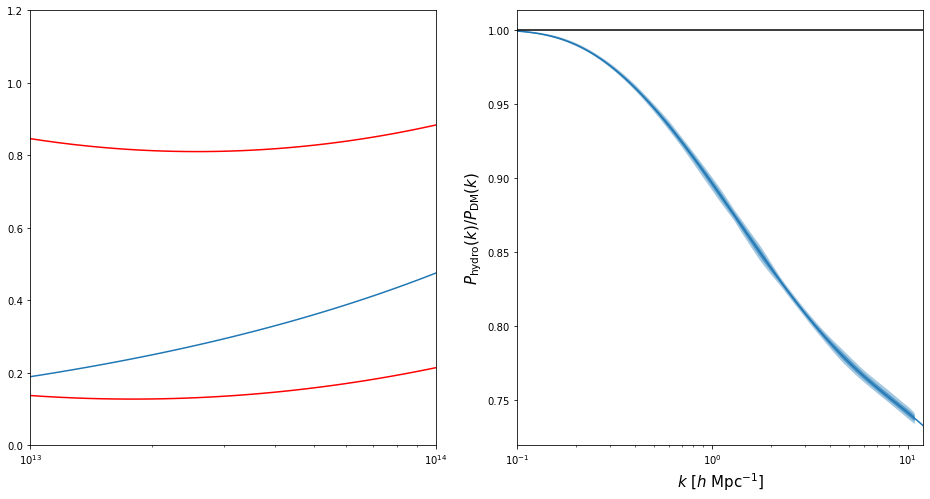

In [12]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(16, 8))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.plot(om, min_fb, c='r')
ax1.plot(om, max_fb, c='r')
ax1.plot(om, fb)
ax1.set_xscale('log')
ax1.set_ylim(0, 1.2);
ax1.set_xlim(1e13, 1e14);

ax2.plot(k, sup, c='C0')
ax2.fill_between(k, sup + error_95_m, sup + error_95_p, facecolor='C0', alpha=0.4)
ax2.fill_between(k, sup + error_68_m, sup + error_68_p, facecolor='C0', alpha=0.6)
ax2.set_xscale('log')
ax2.axhline(1, c='k')
ax2.set_xlabel('$k$ [$h$ Mpc$^{-1}$]');
ax2.set_ylabel('$P_\mathrm{hydro}(k)/P_\mathrm{DM}(k)$');
ax2.set_xlim(0.1, 12);

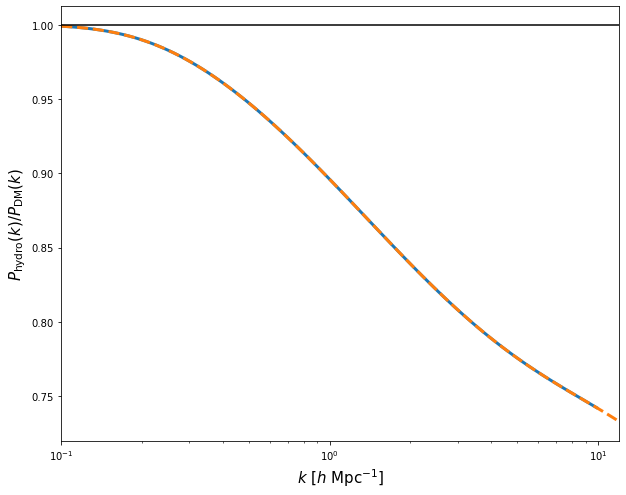

In [17]:
k = np.logspace(-1, 1, 100)[::-1]
om = spk.optimal_mass(SO=200, z=z, k=k)
fb = fb_a * np.power(om / fb_norm, fb_pow)

k, sup = spk.sup_model(SO=200, z=z, M_halo=om, fb=fb, k_max=12)
plt.plot(k, sup, c='C0', lw=3)

k = np.logspace(-1, -.5)[::-1]
om = spk.optimal_mass(SO=200, z=z, k=k)
fb = fb_a * np.power(om / fb_norm, fb_pow)
k, sup = spk.sup_model(SO=200, z=z, M_halo=om, fb=fb, k_max=12, extrapolate=True)
plt.plot(k, sup, c='C1', ls='--', lw=3)


plt.xscale('log')
plt.axhline(1, c='k')
plt.xlabel('$k$ [$h$ Mpc$^{-1}$]');
plt.ylabel('$P_\mathrm{hydro}(k)/P_\mathrm{DM}(k)$');
plt.xlim(0.1, 12);

## Help

Further information can be found by using python help:

In [14]:
help(spk)

Help on module pyspk.model in pyspk:

NAME
    pyspk.model

FUNCTIONS
    optimal_mass(SO, z, k, verbose=False)
        Optimal mass function as a function of scale and redshift for a specific 
        spherical over-density. Defined in eq.(2) in Salcido et al. (2022).
        
        Parameters
        ----------
        SO : int
            spherical over-density. (Only accepts 200 or 500)
        z : float
            redshift z
        k : array of float
            co-moving wavenumber in units [h/Mpc]
        verbose : boolean, default True
            Run in verbose mode
        
        Returns
        -------
        output: array of float
            optimal mass in M_sun units
    
    sup_model(SO, z, fb_a=None, fb_pow=None, fb_norm=1, M_halo=None, fb=None, extrapolate=False, k_min=0.1, k_max=8, n=100, errors=False, verbose=False)
        Returns the suppression of the total matter power spectrum as a function of scale 'k' using the SP(k) model.
        Automatically selec